In [53]:
!pip install tensorflow transformers

In [1]:
!pip uninstall transformers==4.20.1 -y

Found existing installation: transformers 4.32.1
Uninstalling transformers-4.32.1:
  Successfully uninstalled transformers-4.32.1


In [6]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/1a/b4ab4b8f8b3a41fade4899fd00b5b2d2dad0981f3e1bb10df4c522975fd7/tensorflow-2.15.0.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/ea/df/55525e489c43f9dbb6c8ea27d8a567b3dcd18a22f3c45483055f5ca6611d/libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl.metadata
  Obtai

In [7]:
!python3 -m pip install transformers


In [8]:
import transformers

print(transformers.__version__)

4.37.2


In [9]:
from transformers import DistilBertTokenizer
from transformers import DistilBertForSequenceClassification
from transformers import TextClassificationPipeline

import tensorflow as tf
import pandas as pd
import json
import gc

from sklearn.model_selection import train_test_split

import  nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopw = stopwords.words('english')

import seaborn as sns
import matplotlib.pyplot as plt

from plotly.offline import iplot
from tqdm import tqdm



2024-02-13 11:38:24.488775: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-13 11:38:24.528228: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 11:38:24.528300: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 11:38:24.529861: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-13 11:38:24.537751: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-13 11:38:24.538208: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [14]:
import pandas as pd
root_path = './inputs/bbc-text.csv'
df= pd.read_csv(root_path)
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [17]:
df.shape

(2225, 3)

In [16]:
df['count'] = df['text'].apply(lambda x: len(x.split()))

/home/dima/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 800x800 with 0 Axes>

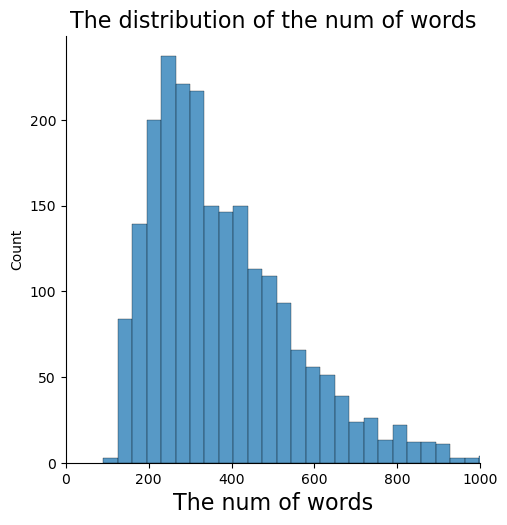

In [20]:
plt.figure(figsize=(8,8))
sns.displot(df['count'])
plt.xlim(0,1000)
plt.xlabel('The num of words',fontsize = 16)
plt.title('The distribution of the num of words', fontsize = 16)
plt.show()

#Bar plot for each of the new category


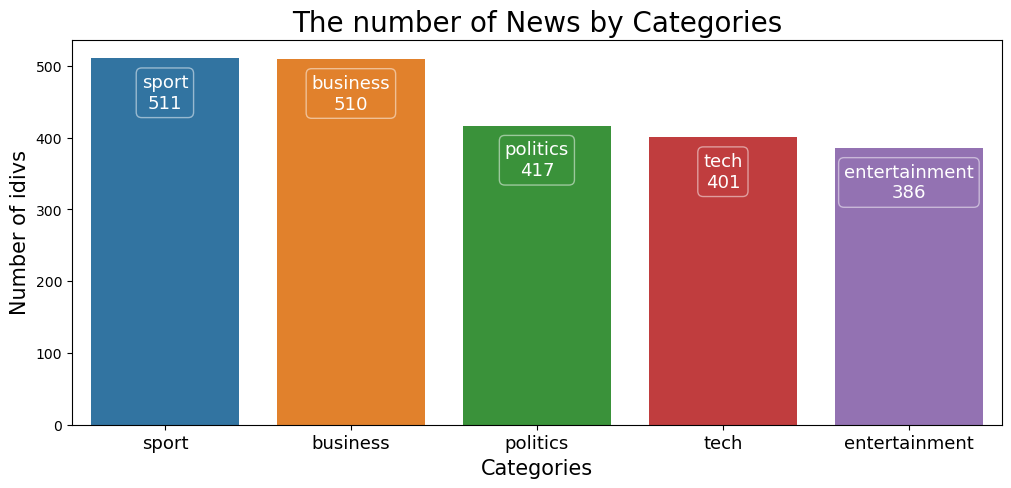

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
category_count = df['category'].value_counts()

categories = category_count.index

categories

fig = plt.figure(figsize=(12,5))

ax= fig.add_subplot(111)
sns.barplot(x= category_count.index, y= category_count.values)

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )

plt.xlabel('Categories',size = 15)
plt.ylabel('Number of idivs', size = 15)

plt.xticks(size = 13)

plt.title("The number of News by Categories", size = 20)
plt.show()

In [28]:
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [29]:
df['encoded_text']= df['category'].astype('category').cat.codes
df.head()

,category,text,count,encoded_text
0,tech,tv future in the hands of viewers with home th...,737,4
1,business,worldcom boss left books alone former worldc...,300,0
2,sport,tigers wary of farrell gamble leicester say ...,246,3
3,sport,yeading face newcastle in fa cup premiership s...,341,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,260,1


In [35]:
data_texts = df['text'].tolist()
data_labels = df['encoded_text'].tolist()

## Train Test Split



In [40]:
from sklearn.model_selection import train_test_split
train_texts,val_texts,train_labels,val_labels = train_test_split(data_texts,data_labels,test_size=0.2,random_state=0)

train_texts, test_texts , train_labels, test_labels = train_test_split(train_texts, train_labels, test_size=0.01, random_state=0)



## Model Definition


In [42]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_encodings= tokenizer(train_texts, truncation=True, padding=True)
val_encodings= tokenizer(val_texts, truncation=True, padding=True)



tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [50]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
)
)

2024-02-13 12:26:38.708752: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-13 12:26:38.710425: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Fin-Tuning with the TFTTrainer class


In [54]:
from transformers import TFDistilBertForSequenceClassification,Trainer,TFTrainingArguments 

training_args = TFTrainingArguments(
    output_dir='./results',
    num_train_epochs=7,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=1e-5,
    logging_dir='./logs',
    eval_steps=100
    )
with training_args.strategy.scope():
    trainer_model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=5)

trainer = Trainer(
    model = trainer_model,
    args =training_args,
    train_dataset = train_dataset,
    eval_dataset = val_dataset,

)


ImportError: cannot import name 'TFTrainer' from 'transformers' (/home/dima/anaconda3/lib/python3.11/site-packages/transformers/__init__.py)